In [57]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [58]:
#Assign csv file path to variable
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

#Read csv file
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# #Test to see a sample of the 2 dataframes
# print(mouse_metadata.head(3))
# print(study_results.head(3))

# Combine the data into a single dataset
mouse_merged=pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
print("Number of rows before removing duplicates:")
print(mouse_merged.count()["Mouse ID"])
# Display the data table for preview
mouse_merged.loc[2:10]

Number of rows before removing duplicates:
1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
10,s185,Capomulin,Female,3,17,0,45.000000,0


In [59]:
 # Merged and uncleaned Data. 
 # Checking the number of mice rows in dataframe
 number_of_rows=mouse_merged["Mouse ID"].count()
 print(f"Number of rows before clean: {number_of_rows}")

Number of rows before clean: 1893


In [60]:
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
##View all rows which are duplicated for subset Mouse ID and Timepoint: duplicated_rows. keep=False will print out everything duplicated including first and last occurence. Else, remove it to see only the duplicates aftr first occurence that is intended to be deleted.
 
duplicated_rows=mouse_merged[mouse_merged.duplicated(["Mouse ID","Timepoint"],keep=False)]
print(duplicated_rows)

#Number of rows to be deleted. Code using keep=True
duplicated_rows=mouse_merged[mouse_merged.duplicated(["Mouse ID","Timepoint"])]
duplicated_rows
print("\nNumber of duplicated rows to be deleted:")
print(duplicated_rows.count()["Mouse ID"])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [61]:
##CLEAN, MERGED DATA ##
#Remove duplicate rows, keep the first duplicated row and remove the others (keep="first": default API ref does this already)
clean_merged=mouse_merged.drop_duplicates(subset=["Mouse ID","Timepoint"])
clean_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [62]:
# Merged and cleaned Data. 
# Checking the number of mice rows in dataframe
number_of_rows=clean_merged["Mouse ID"].count()
print(f"Number of rows after clean: {number_of_rows}")

Number of rows after clean: 1888


SUMMARY STATISTICS

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#Make a copy of the clean_merged dataframe
clean_grouped=clean_merged.copy()
clean_grouped

#Group by Drug Regimen types
regimen=clean_grouped.groupby(["Drug Regimen"])

#Attain for volume, the mean
mean=regimen.mean()["Tumor Volume (mm3)"]
print(f"Mean of Tumor Volume:\n{mean}\n")

#Attain for volume, the median
median=regimen.median()["Tumor Volume (mm3)"]
print(f"Median of Tumor Volume:\n{median}\n")

#Attain for volume, the variance
variance=regimen.var()["Tumor Volume (mm3)"]
print(f"Variance of Tumor Volume:\n{variance}\n")

#Attain for volume, the standard deviation
std_dev=regimen.std()["Tumor Volume (mm3)"]
print(f"Standard Deviation of Tumor Volume:\n{std_dev}\n")

#Attain for volume, the standard error of the mean of the groups
std_error=regimen.sem()["Tumor Volume (mm3)"]
print(f"Standard Error of the Mean of Tumor Volume:\n{std_error}\n")

Mean of Tumor Volume:
Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

Median of Tumor Volume:
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

Variance of Tumor Volume:
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

Standard Deviation of Tumor Volume:
Drug Regimen
Capomulin    4.994774
Ce

BAR AND PIE CHARTS

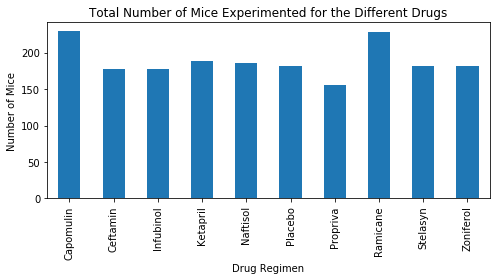

In [64]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#Count number of nice in each Drug Regimen category
regimen_total_mice=regimen.count()["Mouse ID"]
regimen_total_mice

#---------PANDA BAR CHART ------------
#Use DataFrame.plot() in order to create a bar chart of the data
regimen_total_mice.plot(kind="bar", figsize=(7,4));

#---------------------------------------------
# Set a title for the chart
plt.title("Total Number of Mice Experimented for the Different Drugs");
plt.ylabel("Number of Mice");

# #Show plot
# plt.show();
#Ensure all text on graph is showing, auto-adjusts location of axes
plt.tight_layout();

#####NEED TO EDIT THIS TO ALLOW FOR SPACING ON BOTH SIDES OF CHART

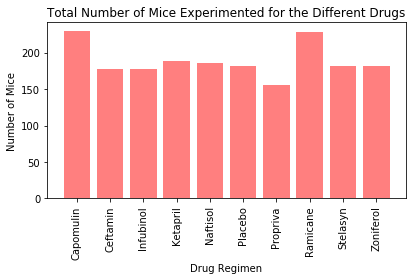

In [65]:
#------------PYPLOT BAR CHART--------------#
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

#Reset index of dataframe
regimen_total_mice=regimen_total_mice.reset_index()

#Set x axis and tick locations
x_axis = np.arange(len(regimen_total_mice))
tick_locations = [value for value in x_axis]
# Create the bar chart with number of ticks (bars) defined from x_axis variable
plt.bar(x_axis, regimen_total_mice["Mouse ID"], color='r', alpha=0.5, align="center")
#Name the ticks (bars) on the x-axis
plt.xticks(tick_locations, regimen_total_mice["Drug Regimen"], rotation="vertical")

#-------------------------------------------
# Set a title for the chart
plt.title("Total Number of Mice Experimented for the Different Drugs")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
#Ensure all text on graph is showing, auto-adjusts location of axes
plt.tight_layout()



        Mouse ID
Sex             
Female       930
Male         958


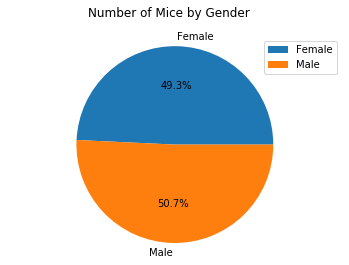

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Dataframe to find number of Females and males using groupby and count
gender=clean_merged.groupby(["Sex"])
gender_count=gender.count()
gender_count
gender_count=gender_count.drop(columns={"Drug Regimen","Weight (g)", "Tumor Volume (mm3)","Age_months","Timepoint","Metastatic Sites"})
print(gender_count)

####### FIX THIS gender_count=gender_count.rename(column={"Mouse ID":"nothing"})

#---------PANDA PIE CHART ------------
#Use DataFrame.plot() in order to create a pie chart of the data
gender_count.plot(kind="pie", subplots=True, startangle=0, title="Number of Mice by Gender",legend=True,fontsize=10, figsize=(6,4), autopct="%1.1f%%");

plt.xlabel("")
plt.ylabel("")
#labels=gender_count.index, 
# labels=gender_count.index,
#---------
# Create axes which are equal so we have a perfect circle
plt.axis("equal");


        Mouse ID
Sex             
Female       930
Male         958


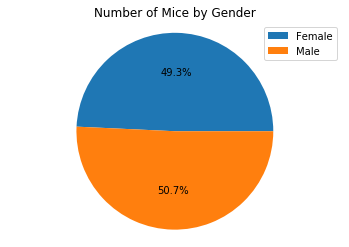

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count=gender.count()
gender_count
gender_count=gender_count.drop(columns={"Drug Regimen","Weight (g)", "Tumor Volume (mm3)","Age_months","Timepoint","Metastatic Sites"})
print(gender_count)

#---------PYPLOT PIE CHART ------------

plt.pie(gender_count,autopct="%1.1f%%")
plt.title("Number of Mice by Gender")
plt.axis("equal")
#plt.legend(["Female","Male"])
plt.legend(gender_count.index)
plt.show();


 Quartiles, Outliers and Boxplots

In [68]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.

#Get the last (greatest) timepoint for each mouse. 
tumor_vol=mouse_merged.drop_duplicates(subset=["Mouse ID"],keep="last")
tumor_vol

######-----------

# final_tumor_vol=tumor_vol[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
# print(final_tumor_vol)

# #Calculate the quartiles and IQR of the tumor volume and quantitatively determine if there are any potential outliers across all four treatment regimens.

# quartiles = final_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of tumor volume (mm3) is: {lowerq:.2f}")
# print(f"The upper quartile of tumor volume (mm3) is: {upperq:.2f}")
# print(f"The interquartile range of tumor volume (mm3) is: {iqr:.2f}")
# print(f"The the median of tumor volume (mm3) is: {quartiles[0.5]:.2f} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound:.2f} could be outliers.")
# print(f"Values above {upper_bound:.2f} could be outliers.")


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [69]:
# CAPOMULIN QUARTILES AND OUTLIERS
# Calculate the final tumor volume of each mouse across Capomulin.

#Filter for Regimen "Capomulin" rows
capomul=tumor_vol[tumor_vol["Drug Regimen"].isin(["Capomulin"])]
capomul=capomul.sort_values(by="Tumor Volume (mm3)", ascending=True)
print(capomul)

#Determine Quartiles, IQR, Outliers.
quartiles = capomul["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume (mm3) is: {lowerq:.2f}")
print(f"The upper quartile of tumor volume (mm3) is: {upperq:.2f}")
print(f"The interquartile range of tumor volume (mm3) is: {iqr:.2f}")
print(f"The the median of tumor volume (mm3) is: {quartiles[0.5]:.2f} ")

#Outliers, values below lower_bound and values above upper_bound
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound:.2f} could be outliers.")
print(f"Values above {upper_bound:.2f} could be outliers.")

#Outliers Table
capomul_outlier=capomul[(capomul["Tumor Volume (mm3)"]<lower_bound)|(capomul["Tumor Volume (mm3)"]>upper_bound)]

x=capomul_outlier.count()["Mouse ID"]
print(f"There are {x} outliers. \nSee following table for outlier list.")
#print outlier table
capomul_outlier

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
19       s185    Capomulin  Female           3          17         45   
39       m601    Capomulin    Male          22          17         45   
29       x401    Capomulin  Female          16          15         45   
64       f966    Capomulin    Male          16          17         20   
104      u364    Capomulin    Male          18          17         45   
124      y793    Capomulin    Male          17          17         45   
134      r554    Capomulin  Female           8          17         45   
144      m957    Capomulin  Female           3          19         45   
164      t565    Capomulin  Female          20          17         45   
224      w914    Capomulin    Male          24          21         45   
244      g288    Capomulin    Male           3          19         45   
204      i738    Capomulin  Female          23          20         45   
337      j119    Capomulin  Female           7     

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [70]:
#RAMICANE QUARTILES AND OUTLIERS
#Calculate the final tumor volume of each mouse across Ramicane.

#Filter for Regimen "Ramicane" rows
rami=tumor_vol[tumor_vol["Drug Regimen"].isin(["Ramicane"])]
rami=rami.sort_values(by="Tumor Volume (mm3)", ascending=True)
print(rami)

#Determine Quartiles, IQR, Outliers.
quartiles = rami["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume (mm3) is: {lowerq:.2f}")
print(f"The upper quartile of tumor volume (mm3) is: {upperq:.2f}")
print(f"The interquartile range of tumor volume (mm3) is: {iqr:.2f}")
print(f"The the median of tumor volume (mm3) is: {quartiles[0.5]:.2f} ")

#Outliers, values below lower_bound and values above upper_bound
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound:.2f} could be outliers.")
print(f"Values above {upper_bound:.2f} could be outliers.")

#Outliers Table
rami_outlier=rami[(rami["Tumor Volume (mm3)"]<lower_bound)|(rami["Tumor Volume (mm3)"]>upper_bound)]

x=rami_outlier.count()["Mouse ID"]
print(f"There are {x} outliers. \nSee following table for outlier list.")
#print outlier table
rami_outlier

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9       k403     Ramicane    Male          21          16         45   
49      g791     Ramicane    Male          11          16         45   
59      s508     Ramicane    Male           1          17         45   
74      m546     Ramicane    Male          18          16         45   
84      z578     Ramicane    Male          11          16         45   
114     n364     Ramicane    Male           4          17         45   
94      j913     Ramicane  Female           4          17         45   
174     a644     Ramicane  Female           7          17         45   
154     c758     Ramicane    Male           9          17         45   
184     i177     Ramicane    Male          10          18         45   
194     j989     Ramicane    Male           8          19         45   
254     i334     Ramicane  Female           8          20         45   
262     q610     Ramicane  Female          18          21       

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [71]:
#INFUBINOL QUARTILES AND OUTLIERS
# # Calculate the final tumor volume of each mouse across Infubinol.

#Filter for Regimen "Infubinol" rows
infub=tumor_vol[tumor_vol["Drug Regimen"].isin(["Infubinol"])]
infub=infub.sort_values(by="Tumor Volume (mm3)", ascending=True)
print(infub)

#Determine Quartiles, IQR, Outliers.
quartiles = capomul["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume (mm3) is: {lowerq:.2f}")
print(f"The upper quartile of tumor volume (mm3) is: {upperq:.2f}")
print(f"The interquartile range of tumor volume (mm3) is: {iqr:.2f}")
print(f"The the median of tumor volume (mm3) is: {quartiles[0.5]:.2f} ")

#Outliers, values below lower_bound and values above upper_bound
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound:.2f} could be outliers.")
print(f"Values above {upper_bound:.2f} could be outliers.")

#Outliers Table
infub_outlier=infub[(infub["Tumor Volume (mm3)"]<lower_bound)|(infub["Tumor Volume (mm3)"]>upper_bound)]

x=infub_outlier.count()["Mouse ID"]
print(f"There are {x} outliers. \nSee following table for outlier list.")
#print outlier table
infub_outlier

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669      c326    Infubinol  Female          18          25          5   
1314     o813    Infubinol    Male          24          28          5   
1616     v339    Infubinol    Male          20          26          5   
1205     m756    Infubinol    Male          19          30          5   
1683     w193    Infubinol    Male          22          30         20   
1640     v766    Infubinol    Male          16          27         15   
1632     v719    Infubinol  Female          17          30         20   
1397     q132    Infubinol  Female           1          30         30   
1312     o809    Infubinol    Male           3          25         35   
1485     s121    Infubinol    Male          23          26         25   
530      a577    Infubinol  Female           6          25         30   
1726     w584    Infubinol    Male           3          29         30   
1225     n671    Infubinol    Male          18     

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1632,v719,Infubinol,Female,17,30,20,54.048608,1
1397,q132,Infubinol,Female,1,30,30,54.656549,4
1312,o809,Infubinol,Male,3,25,35,55.629428,1
1485,s121,Infubinol,Male,23,26,25,55.650681,2
530,a577,Infubinol,Female,6,25,30,57.031862,2
1726,w584,Infubinol,Male,3,29,30,58.268442,1
1225,n671,Infubinol,Male,18,25,30,60.165180,0
834,f345,Infubinol,Male,23,26,45,60.918767,1
742,c895,Infubinol,Female,7,29,30,60.969711,2
1076,k804,Infubinol,Female,23,29,35,62.117279,2


In [72]:
#CEFTAMIN QUARTILES AND OUTLIERS
# Calculate the final tumor volume of each mouse across Ceftamin.

#Filter for Regimen "Ceftamin" rows
cef=tumor_vol[tumor_vol["Drug Regimen"].isin(["Ceftamin"])]
cef=cef.sort_values(by="Tumor Volume (mm3)", ascending=True)
print(cef)

#Determine Quartiles, IQR, Outliers.
quartiles = cef["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume (mm3) is: {lowerq:.2f}")
print(f"The upper quartile of tumor volume (mm3) is: {upperq:.2f}")
print(f"The interquartile range of tumor volume (mm3) is: {iqr:.2f}")
print(f"The the median of tumor volume (mm3) is: {quartiles[0.5]:.2f} ")

#Outliers, values below lower_bound and values above upper_bound
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound:.2f} could be outliers.")
print(f"Values above {upper_bound:.2f} could be outliers.")

#Outliers Table
cef_outlier=cef[(cef["Tumor Volume (mm3)"]<lower_bound)|(cef["Tumor Volume (mm3)"]>upper_bound)]

x=cef_outlier.count()["Mouse ID"]
print(f"There are {x} outliers. \nSee following table for outlier list.")
#print outlier table
cef_outlier

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1743     x226     Ceftamin    Male          23          28          0   
594      b447     Ceftamin    Male           2          30          0   
1583     u153     Ceftamin  Female          11          25          0   
1551     t573     Ceftamin  Female          15          27          0   
1122     l558     Ceftamin  Female          13          30         10   
940      h531     Ceftamin    Male           5          27          5   
840      f436     Ceftamin  Female           3          25         15   
1582     u149     Ceftamin    Male          24          29         25   
617      b759     Ceftamin  Female          12          25         30   
600      b487     Ceftamin  Female           6          28         25   
1119     l490     Ceftamin    Male          24          26         30   
1260     o287     Ceftamin    Male           2          28         45   
1132     l661     Ceftamin    Male          18     

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [73]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.